# Task-1: IRIS FLOWER CLASSIFICATION

Iris Dataset link: https://www.kaggle.com/datasets/saurabh00007/iriscsv

> **Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
measurements. Now assume that you have the measurements of the iris flowers according to
their species, and here your task is to train a machine learning model that can learn from the
measurements of the iris species and classify them.**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
from sklearn.model_selection import train_test_split


 **Loading the dataset**

In [2]:
data=pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# removing the "ID" column from the dataset
data=data.drop(columns=['Id'])
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# "data.describe()" method returns description of the data in the DataFrame.
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#data information can be accessed by "data.info()"
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
#Extracting Independent and dependent Variable  
x= data.iloc[:, [2,3]].values  
y= data.iloc[:, 4].values  

In [8]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

**Preprocessing the data**

In [9]:
# "isnull()" method returns a DataFrame object where all the values are replaced with a Boolean value True for NULL values, and otherwise False.
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# **EXPLORATORY DATA ANALYSIS**
**EDA includes:**

Descriptive analysis of each attribute in a dataset for numerical, categorical; 

Correlation analysis of two attributes (numerical vs. numerical, numerical vs. categorical, and categorical vs. categorical) through qualitative and/or quantitative analysis.

**HISTOGRAMS**

Text(0, 0.5, 'frequency')

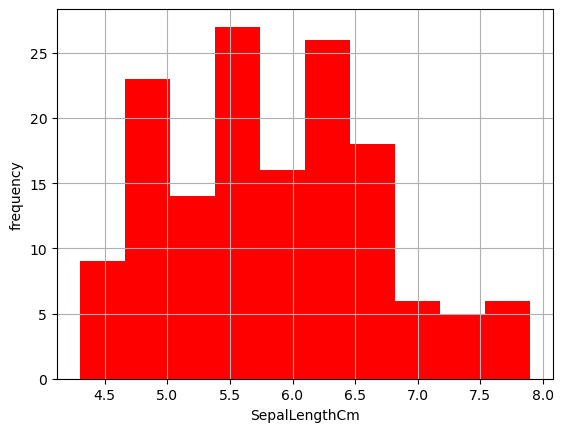

In [10]:
data['SepalLengthCm'].hist(color='red')
plt.xlabel('SepalLengthCm')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

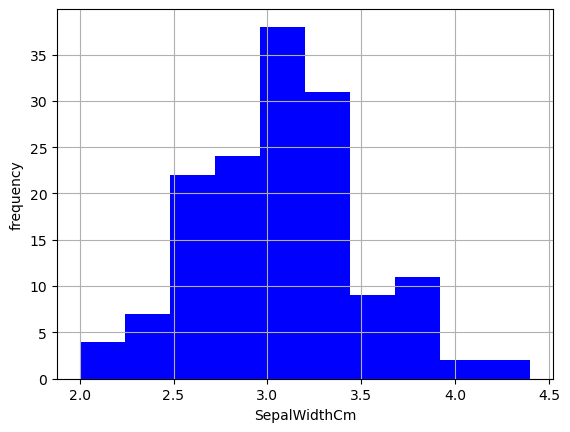

In [11]:
data['SepalWidthCm'].hist(color='blue')
plt.xlabel('SepalWidthCm')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

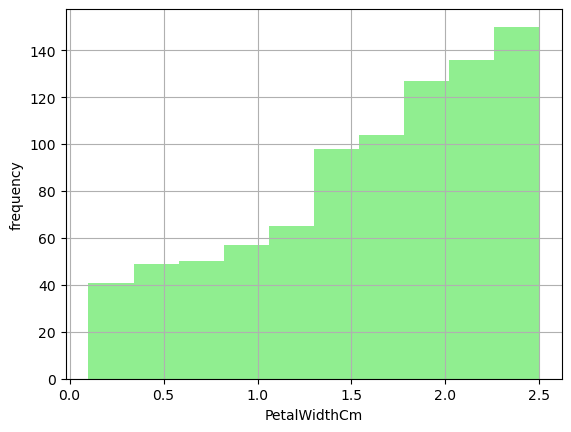

In [12]:
data['PetalWidthCm'].hist(color='lightgreen',cumulative=True)
plt.xlabel('PetalWidthCm')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

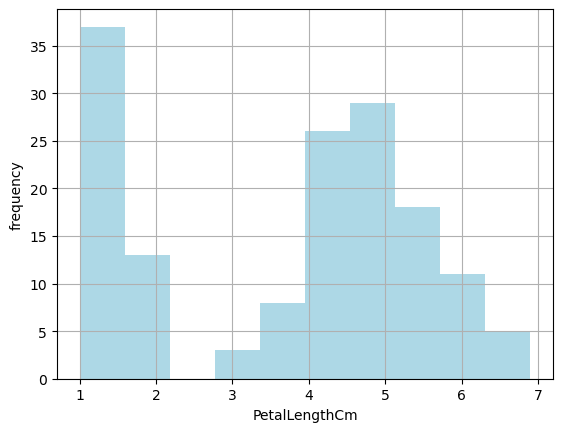

In [13]:
data['PetalLengthCm'].hist(color='lightblue')
plt.xlabel('PetalLengthCm')
plt.ylabel('frequency')

**BOXPLOT**

<Axes: xlabel='SepalLengthCm'>

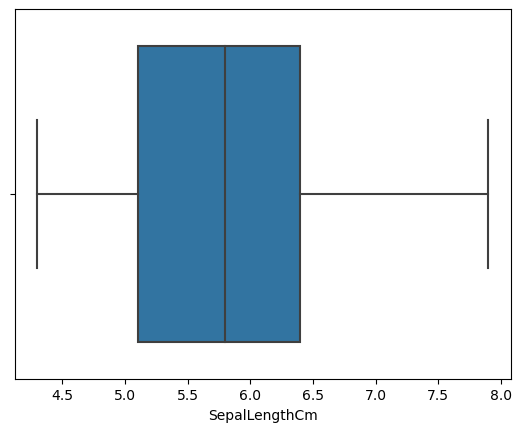

In [14]:
sns.boxplot(x=data['SepalLengthCm'])

<Axes: xlabel='SepalWidthCm'>

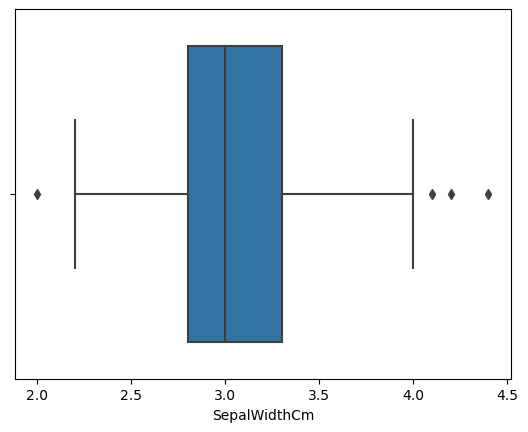

In [15]:
sns.boxplot(x=data['SepalWidthCm'])

<Axes: xlabel='PetalLengthCm'>

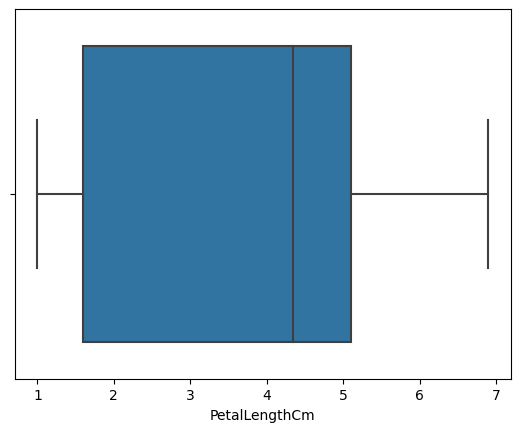

In [16]:
sns.boxplot(x=data['PetalLengthCm'])

<Axes: xlabel='PetalWidthCm'>

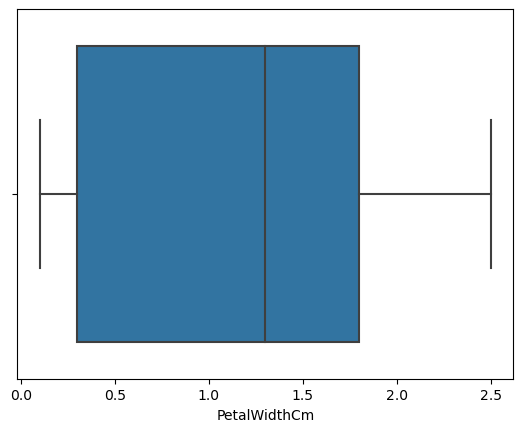

In [17]:
sns.boxplot(x=data['PetalWidthCm'])

**PAIR PLOTS**

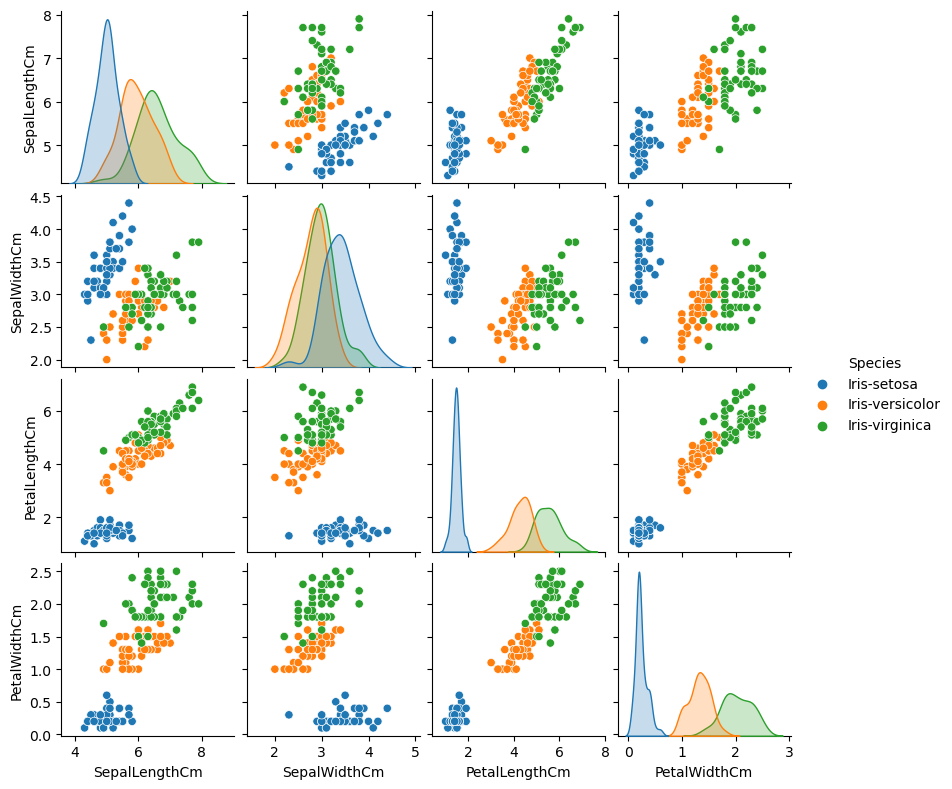

In [18]:
sns.pairplot(data,hue='Species', height=2)

In [19]:
train,test=train_test_split(data,test_size=0.3)

In [20]:
#training data
print(train)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
104            6.5           3.0            5.8           2.2   Iris-virginica
13             4.3           3.0            1.1           0.1      Iris-setosa
46             5.1           3.8            1.6           0.2      Iris-setosa
16             5.4           3.9            1.3           0.4      Iris-setosa
115            6.4           3.2            5.3           2.3   Iris-virginica
..             ...           ...            ...           ...              ...
82             5.8           2.7            3.9           1.2  Iris-versicolor
134            6.1           2.6            5.6           1.4   Iris-virginica
78             6.0           2.9            4.5           1.5  Iris-versicolor
22             4.6           3.6            1.0           0.2      Iris-setosa
49             5.0           3.3            1.4           0.2      Iris-setosa

[105 rows x 5 columns]


In [21]:
#testing data
print(test)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
41             4.5           2.3            1.3           0.3      Iris-setosa
86             6.7           3.1            4.7           1.5  Iris-versicolor
101            5.8           2.7            5.1           1.9   Iris-virginica
144            6.7           3.3            5.7           2.5   Iris-virginica
102            7.1           3.0            5.9           2.1   Iris-virginica
39             5.1           3.4            1.5           0.2      Iris-setosa
71             6.1           2.8            4.0           1.3  Iris-versicolor
19             5.1           3.8            1.5           0.3      Iris-setosa
107            7.3           2.9            6.3           1.8   Iris-virginica
146            6.3           2.5            5.0           1.9   Iris-virginica
84             5.4           3.0            4.5           1.5  Iris-versicolor
141            6.9           3.1            5.1     

In [22]:
train_x=train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y=train[['Species']]

In [23]:
train_x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
104,6.5,3.0,5.8,2.2
13,4.3,3.0,1.1,0.1
46,5.1,3.8,1.6,0.2
16,5.4,3.9,1.3,0.4
115,6.4,3.2,5.3,2.3
...,...,...,...,...
82,5.8,2.7,3.9,1.2
134,6.1,2.6,5.6,1.4
78,6.0,2.9,4.5,1.5
22,4.6,3.6,1.0,0.2


In [24]:
train_y

,Species
104,Iris-virginica
13,Iris-setosa
46,Iris-setosa
16,Iris-setosa
115,Iris-virginica
...,...
82,Iris-versicolor
134,Iris-virginica
78,Iris-versicolor
22,Iris-setosa


In [25]:
test_x=test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_y=test[['Species']]

In [26]:
test_x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
41,4.5,2.3,1.3,0.3
86,6.7,3.1,4.7,1.5
101,5.8,2.7,5.1,1.9
144,6.7,3.3,5.7,2.5
102,7.1,3.0,5.9,2.1
39,5.1,3.4,1.5,0.2
71,6.1,2.8,4.0,1.3
19,5.1,3.8,1.5,0.3
107,7.3,2.9,6.3,1.8
146,6.3,2.5,5.0,1.9


In [27]:
test_y

,Species
41,Iris-setosa
86,Iris-versicolor
101,Iris-virginica
144,Iris-virginica
102,Iris-virginica
39,Iris-setosa
71,Iris-versicolor
19,Iris-setosa
107,Iris-virginica
146,Iris-virginica


In [28]:
data.shape

(150, 5)

# Decision Tree
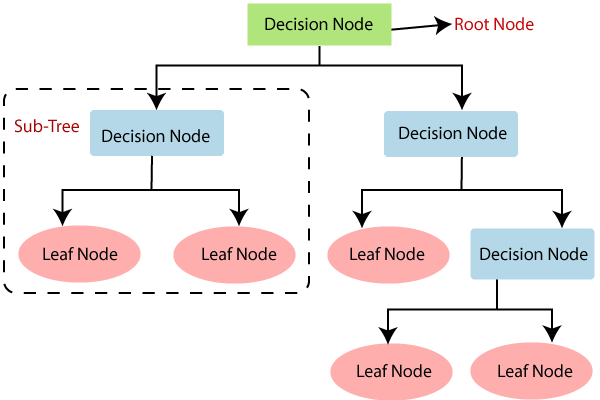

In [29]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(train_x,train_y)
y_predict=model.predict(test_x)

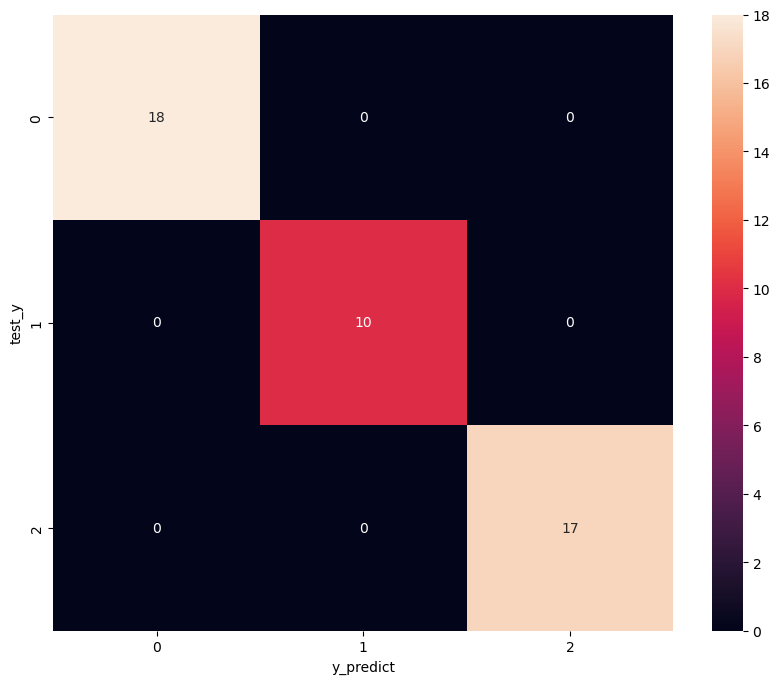

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_predict,test_y)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True)
plt.xlabel('y_predict')
plt.ylabel('test_y')
plt.show()

In [31]:
print(classification_report(y_predict,test_y))
print('accuracy_score', accuracy_score(y_predict,test_y))
print('Model score',model.score(test_x,test_y))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        17

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

accuracy_score 1.0
Model score 1.0
